# Dataset Preprocessing

ID - 207043951

In [1]:
import random, cv2, os,math, torchvision,matplotlib.pyplot as plt,numpy as np
from scipy.signal import convolve2d

- Download the mnist data usin the code snippet below
import torchvision
mnist_data = torchvision.datasets.MNIST(root='', download=True)
this downloads the data to root ('') folder. Change the root to a convenient location.

In [2]:
mnist_data = torchvision.datasets.MNIST(root='', download=True, train=True);

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



#plots and helpful functions.

In [3]:
def create_subplots(images:list, titles:list = None,wantAxis = False,figsize=(12, 8)):
    fig = plt.figure(figsize=figsize)
    num_subplots = len(images)
    for i in range(num_subplots):
        plt.subplot(1, num_subplots, i+1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off" if wantAxis ==False else "on")
        plt.title(titles[i] if titles != None else i)
    plt.show()

def show(image,WantAxis=True,text="Image"):
  create_subplots([image],[text],WantAxis,(6,4))

def showNum(database,num):
  show(database[num][0])
#showNum(my_new_DB,10)

def p(string):
  print(f'{string}')

def plotSome(size=3):
  fig,ax = plt.subplots(size,size,figsize = (6,3))
  ax = ax.ravel()
  for i in range(size**2): #augmentations num
    class_num = random.randint(0,101)
    pos = random.randint(0, len(my_new_DB[class_num]))
    img = my_new_DB[class_num][pos]
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f"label = {class_num}")
    ax[i].axis('off')
  plt.tight_layout()
  plt.show()


(60000, 28, 28)
There are 10 which are ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Text(0.5, 1.0, 'Label = 3')

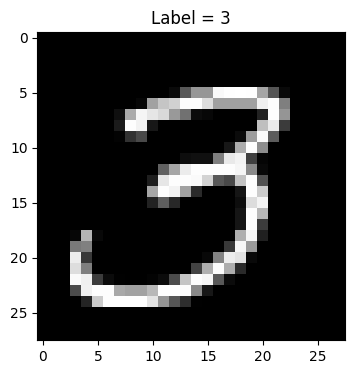

In [4]:
# Acessing the data within
images = mnist_data.data.numpy()
labels = mnist_data.targets.numpy()
print(images.shape) #60K Images with Dimension 28X28
print(f"There are {len(mnist_data.classes)} which are {mnist_data.classes}")

# Plot a random num
plt.rcParams["figure.figsize"] = (8, 4)
rand_indx = np.random.randint(len(images))
plt.imshow(images[rand_indx], cmap="gray")
plt.title(f"Label = {labels[rand_indx]}")


- Show at least 5 samples of each class (0-9). Always add proper titles and choose the correct color map

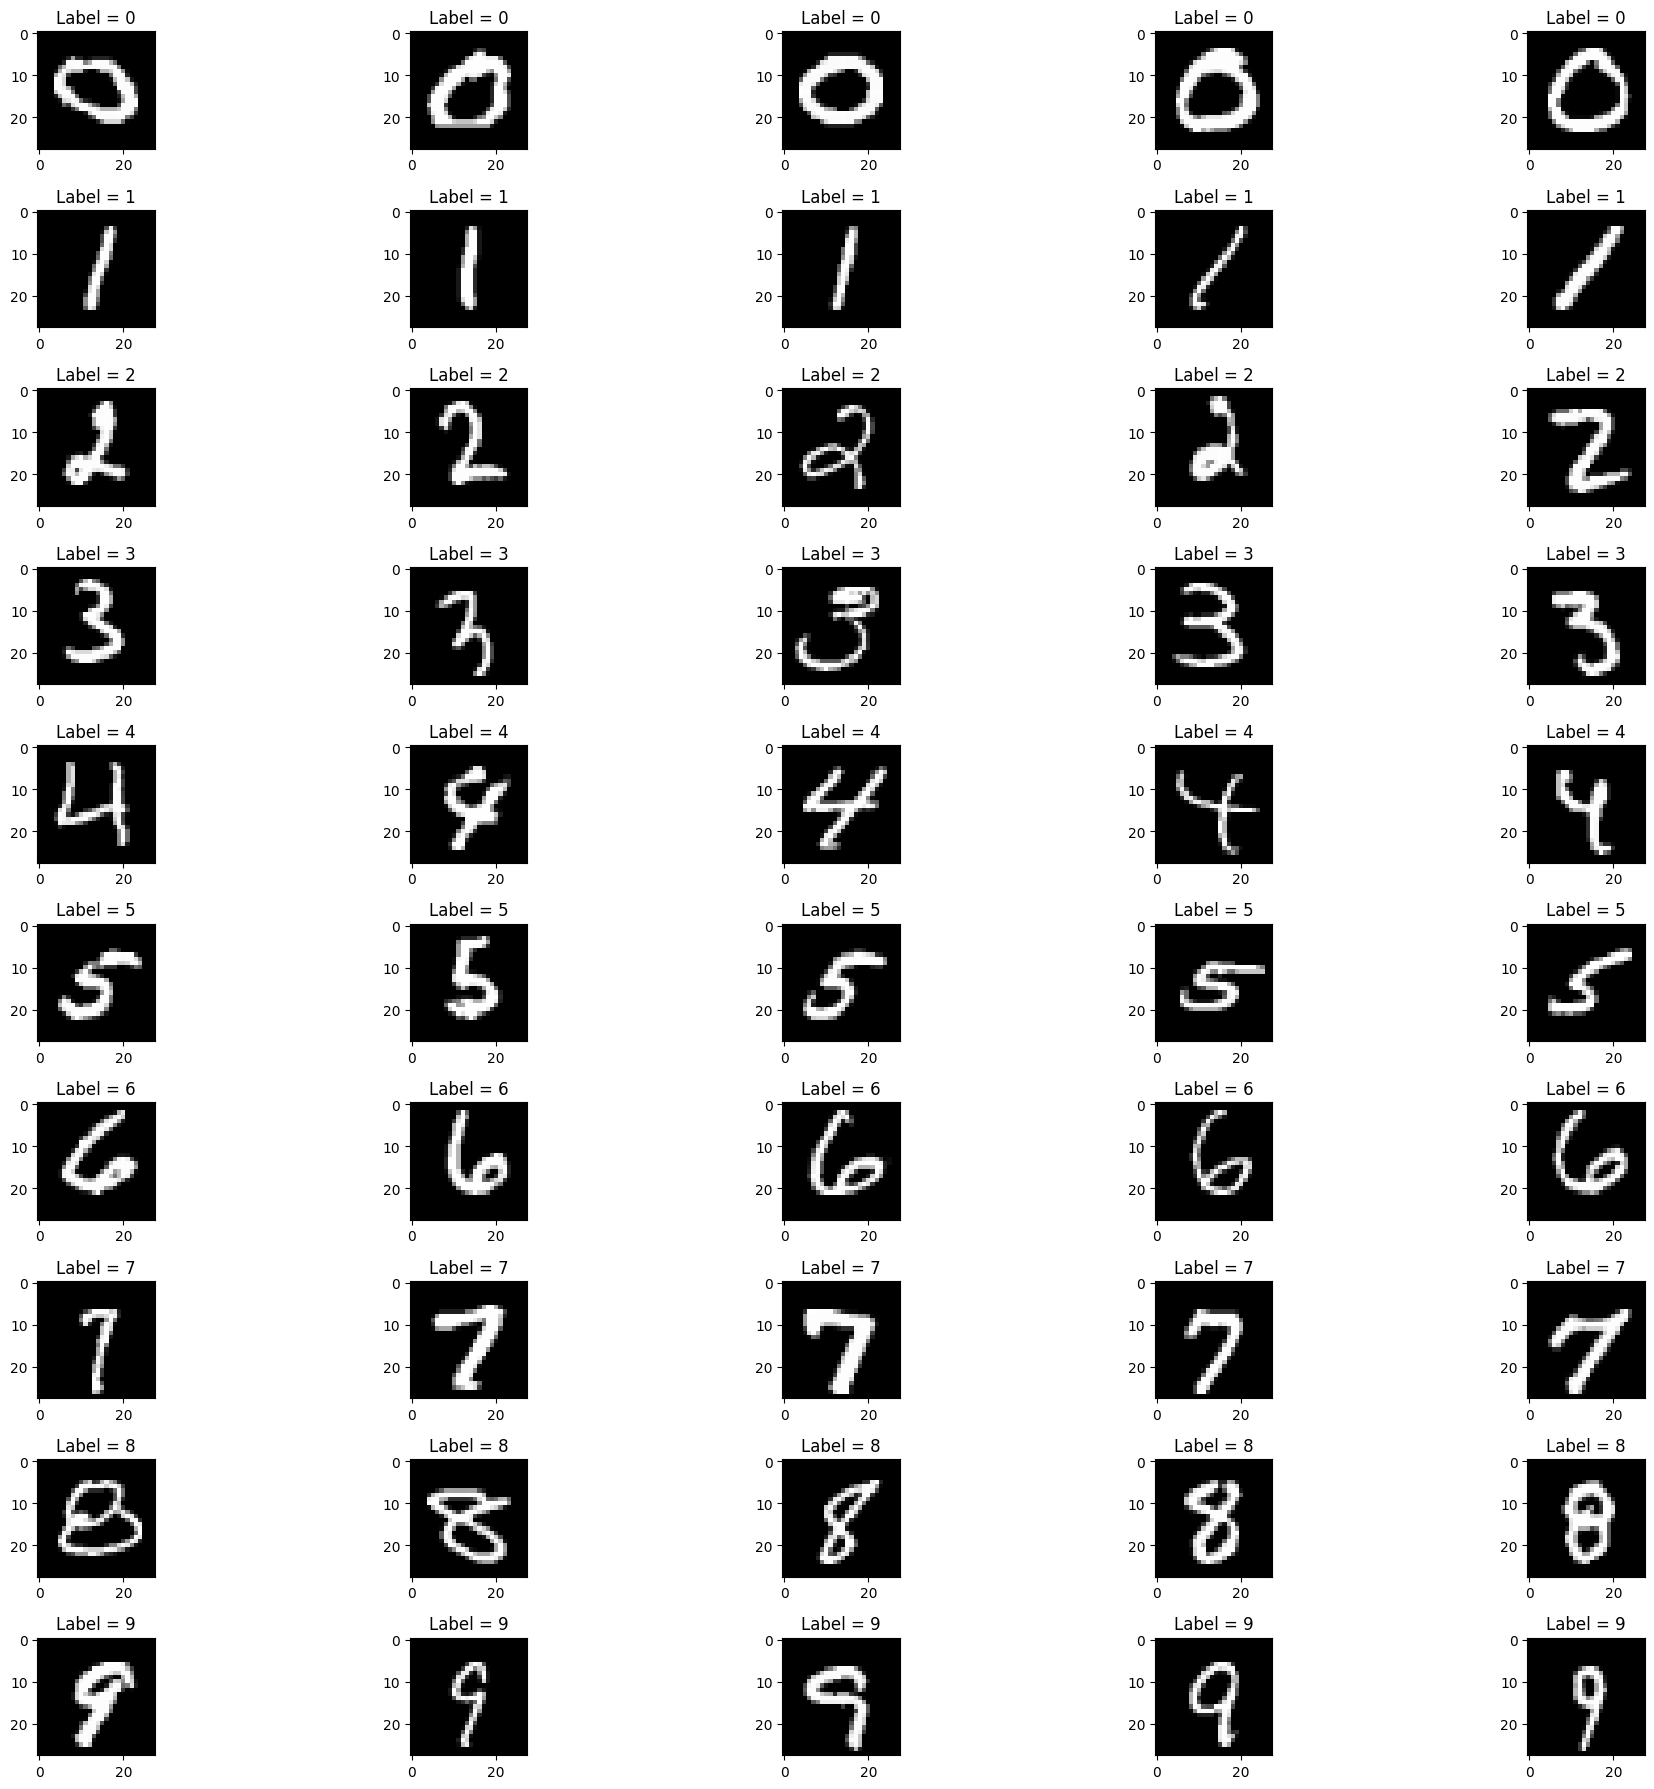

In [5]:
image_by_class = [images[labels == i] for i in range(len(mnist_data.classes))]
dict_lens = {i: len(image_by_class[i]) for i in range(10)}

x=0
fig,ax = plt.subplots(10,5,figsize = (20,18))
ax = ax.ravel() # from shape 10x5 -> 50
for class_indexs in range(len(image_by_class)): #take array of img class 
  for i in range(5):# 5 imgs from every class
    ax[x].imshow(image_by_class[class_indexs][random.randint(0,dict_lens[class_indexs])],cmap = 'gray')
    ax[x].set_title(f"Label = {class_indexs}")
    x+=1
    
plt.tight_layout()
plt.show()





- Your new dataset should include the three-digits numbers: [000, 001, ..., 055, ..., 099, 100], forming 101 classes.

In [6]:
def makeDirectorys():
  for i in range(102):
    num_str = ('{:03d}'.format(i))
    if not os.path.exists(f'./digit_samples/3digits/{num_str}'):
      os.makedirs(f'./digit_samples/3digits/{num_str}')
import shutil
def cleanDirectorys():
  for i in range(102):
    num_str = ('{:03d}'.format(i))
    if os.path.exists(f'./digit_samples/3digits/{num_str}'):
      shutil.rmtree(f'./digit_samples/3digits/{num_str}')#delete also if there is anything inside

def make3digitDataBase(num=4001):
  new = [list() for i in range(102)]
  for i in range(102):
    ForString = "{:03d}".format(i)
    first, second, third = [int(ForString[j]) for j in range(3)]
    for k in range(num):
      img_tuple = (image_by_class[first][random.randint(0,dict_lens[first]-1)],
                  image_by_class[second][random.randint(0,dict_lens[second]-1)],
                  image_by_class[third][random.randint(0,dict_lens[third]-1)]) #make tuple of 3 images
      img = np.concatenate(img_tuple, axis=1)#make 3 digit image from 3 images of 1 digit
      new[i].append(img)
      cv2.imwrite(f'./digit_samples/3digits/{ForString}/num_{k}.jpeg', img)
  return new

def restart_DB():
  cleanDirectorys()
  makeDirectorys()
  return make3digitDataBase()

In [7]:
my_new_DB = restart_DB()

# Here I'm gonna add some images of what you can't see.
# all the folders i made from the new augmentations, arranged, and full of new images.
Of course, I loaded the images into the array for the purpose of continuing ongoing work in the my_new_DB variable

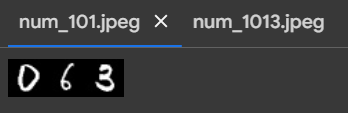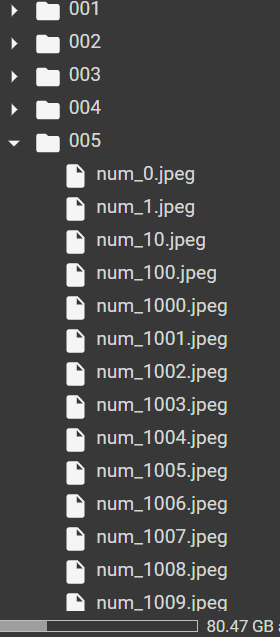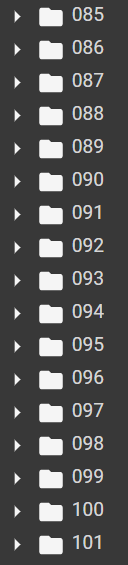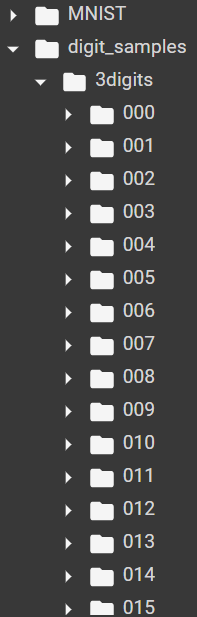


#LAB 3 functions

- Use the augmentations you created on lab 3 on your new dataset and show some results and explain which augmentations are applicable to this specific dataset, which are not and why.

In [8]:
def add_gaussian_noise(image, mu, sigma):
  noise = np.random.normal(mu, sigma, image.shape)
  noisy_image = np.clip(image + noise, 0, 255)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image


I'm not at all sure if it's a good augmentation, it seems that because the image is binary, it's very easy to see the edges and the sharp transitions in color, so it's not useful.

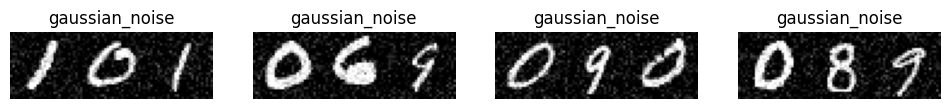

In [9]:
create_subplots([add_gaussian_noise(my_new_DB[i][random.randint(0,100)],0,32) for i in [101,69,90,89]],["gaussian_noise" for i in range(4)])

In [10]:
def Myrotate(image, angle):
    image = image.copy()
    dim = image.shape[-1] if len(image.shape) == 3 else 1
    angle = np.deg2rad(angle)

    height, width = image.shape[:2] 
    center = (width//2, height//2)
   
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    coords = np.stack([x, y], axis=-1)
    coords -= center

    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])

    rotated_coords = np.matmul(coords, rotation_matrix.T)
    rotated_coords += center
    rotated_coords = np.round(rotated_coords).astype(int)

    output_img = np.zeros_like(image)

    mask = (rotated_coords[:,:,0] >= 0) & (rotated_coords[:,:,0] < width) & (rotated_coords[:,:,1] >= 0) & (rotated_coords[:,:,1] < height)
    output_img[mask] = image[rotated_coords[:,:,1][mask], rotated_coords[:,:,0][mask]] if dim == 1 else image[rotated_coords[:,:,1][mask], rotated_coords[:,:,0][mask], :]
    return output_img


as you can see ..
The number 6 can become 9 in reverse, and similar to 9 becoming 6.
In addition, the numbers disappear from the image due to the rotation and this augmentation is really not good.

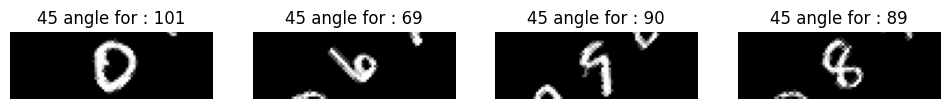

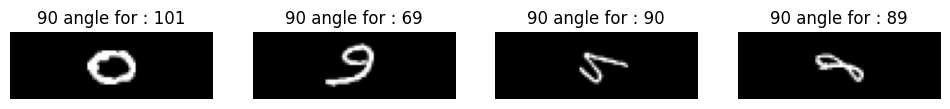

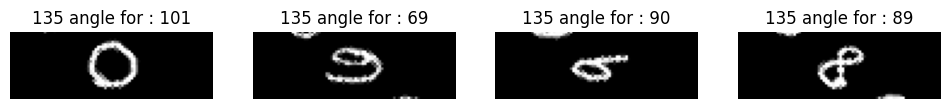

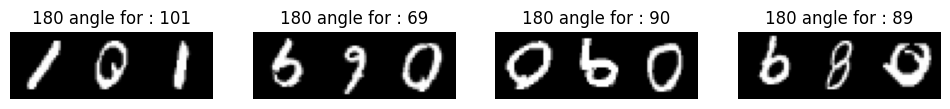

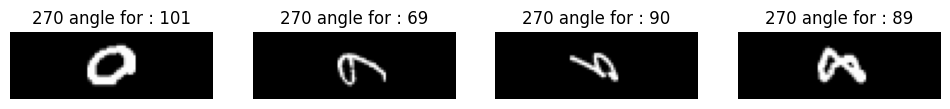

In [11]:
nums = [101,69,90,89]
for k in [45,90,135,180,270]:
  create_subplots([Myrotate(my_new_DB[i][random.randint(0,100)],k) for i in nums],[f'{k} angle for : {nums[j]}' for j in range(4)])

In [12]:
def resize (theimage,SizeX,SizeY):
  return cv2.resize(theimage,(0,0),fx=SizeX,fy=SizeY)

def zoom(image,zoom_factor=1):
	if zoom_factor == 1:
		show(image,True,"Same image")
		return
	image = image.copy()
	x , y = image.shape[0],image.shape[1] 
	resized = resize(image,zoom_factor,zoom_factor)
	if zoom_factor > 1:
		startX,startY = x/2,y/2
		zoomed = resized[int(startX):int(x+startX),int(startY):int(y+startY)]
		return(zoomed)
	else:
		padding = np.zeros((x,y),dtype=np.float64)
		newX,newY = resized.shape[0],resized.shape[1]
		startX,startY = (x-newX)/2 , (y-newY)/2 
		padding[int(startX):int(startX+newX),int(startY):int(startY+newY)] = resized
		return(padding)


You can see that zooming out has the potential for good augmentation, when zooming in it's not really normal and won't help us

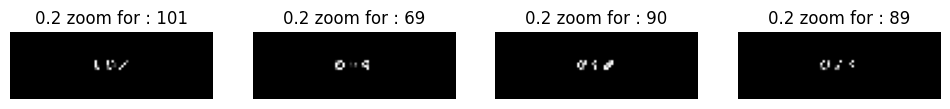

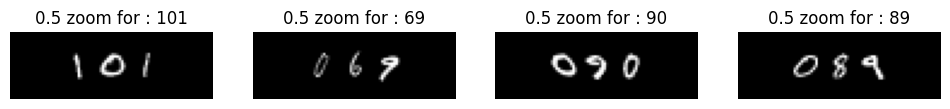

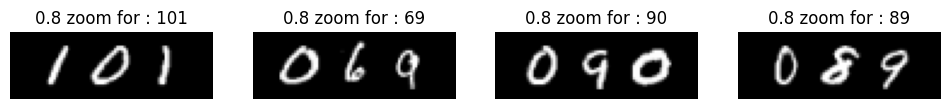

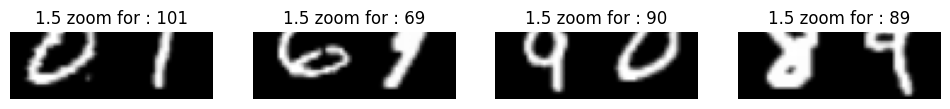

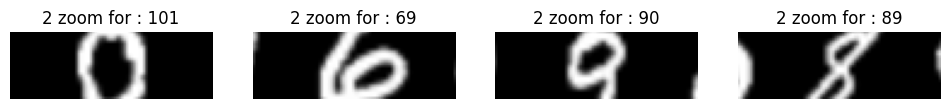

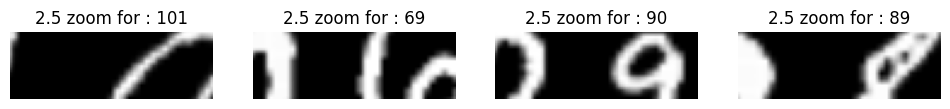

In [13]:
nums = [101,69,90,89]
for k in [0.2,0.5,0.8,1.5,2,2.5]:
  create_subplots([zoom(my_new_DB[i][random.randint(0,100)],k) for i in nums],[f'{k} zoom for : {nums[j]}' for j in range(4)])

In [14]:
# same as fliplr , flipud
def horizontal_vertical_flip(image,num): # 2 implemetions in 1 
    #1 horizontally , 0 vertically
    return cv2.flip(image, num)


a part of the numbers changed there form , its not a good augmentation.

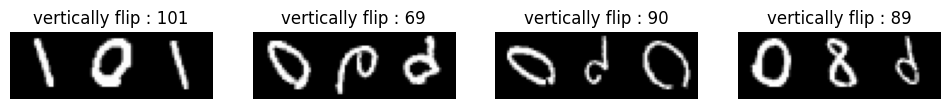

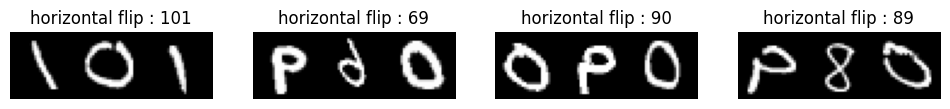

In [15]:
nums = [101,69,90,89]
create_subplots([horizontal_vertical_flip(my_new_DB[i][random.randint(0,100)],0) for i in nums],[f'vertically flip : {nums[i]}' for i in range(4)])
create_subplots([horizontal_vertical_flip(my_new_DB[i][random.randint(0,100)],1) for i in nums],[f'horizontal flip : {nums[i]}' for i in range(4)])

In [16]:
def sharpen(img: np.ndarray):
  sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")
  sharpenimg =  np.abs(convolve2d(img, sharpen))
  return sharpenimg


pretty good one . the numbers are readable and i think that finding the edges will be challnging andd good for training.

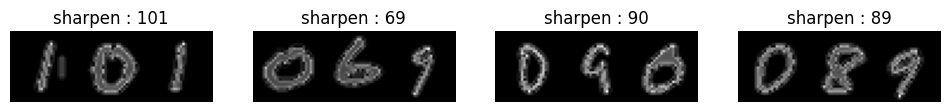

In [17]:
nums = [101,69,90,89]
create_subplots([sharpen(my_new_DB[i][random.randint(0,100)]) for i in nums],[f'sharpen : {nums[i]}' for i in range(4)])

In [18]:
def blur3(img: np.ndarray):
  Blur3 = np.ones((3, 3), dtype="float") * (1.0 / (3 * 3))
  blured =  np.abs(convolve2d(img, Blur3))
  return blured

pretty good one as well.like the last augmentation filter.

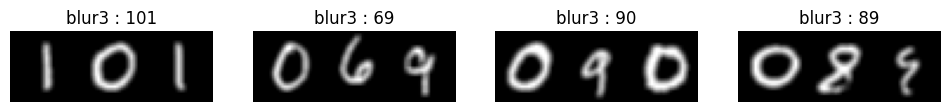

In [19]:
nums = [101,69,90,89]
create_subplots([blur3(my_new_DB[i][random.randint(0,100)]) for i in nums],[f'blur3 : {nums[i]}' for i in range(4)])

- Each student should add about 10 new augmentations (you may use OpenCV). The total number of augmentations will be 15.

In [20]:
def destory_part(the_image,which_Rows=100):
  the_image = the_image.copy()
  le = len(the_image.shape)
  for i in range(which_Rows):
    for j in range(the_image.shape[1]):
      the_image[i][j] = [random.randint(0,255),random.randint(0,255),random.randint(0,255)] if le == 3 else random.randint(0,255)
  return(the_image)

def clipping(image,m,mx):
  image = image.copy()
  return(np.clip(image, a_min=m, a_max=mx))

def push(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (cols, rows))

def salt_and_pepper_noise(image, amount=0.05):
    image = image.copy()
    noise = np.zeros(image.shape, np.uint8)
    cv2.randu(noise, 0, 255)
    salt = noise > 255 * (1 - amount / 2)
    pepper = noise < 255 * amount / 2
    image[salt] = 255
    image[pepper] = 0
    return image

def canny_edge(img: np.ndarray, threshold1: int = 100, threshold2: int = 200):
  res = cv2.Canny(img, threshold1 ,threshold2)
  return res

def bilateral_filtering(img: np.ndarray, d: int = 15, sigma_color: int = 75, sigma_space: int = 75):
  bilateral = cv2.bilateralFilter(img, d, sigma_color, sigma_space)
  return bilateral

def gray_to_rand_bgr(img: np.ndarray):
  size = img.shape
  img = 255 * img
  res = img.astype(np.uint8)
  res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
  res[:,:,0] -= random.randint(0,50)
  res[:,:,1] -= random.randint(0,50)
  res[:,:,2] -= random.randint(0,50)
  res[res < 0] = 0
  return res

def bright(img: np.ndarray, beta_value: int = -30):
    img_bright = cv2.convertScaleAbs(img, beta=beta_value)
    return img_bright

from scipy.signal import convolve2d
#soble_x
def soble_x(img: np.ndarray):
  sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
  sobelx_edges =  np.abs(convolve2d(img, sobelX))
  return sobelx_edges

#soble y
def soble_y(img: np.ndarray):
  sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")
  sobely_edges =  np.abs(convolve2d(img, sobelY))
  return sobely_edges


- Display typical results of your dataset, demonstrating the variability of the new dataset.

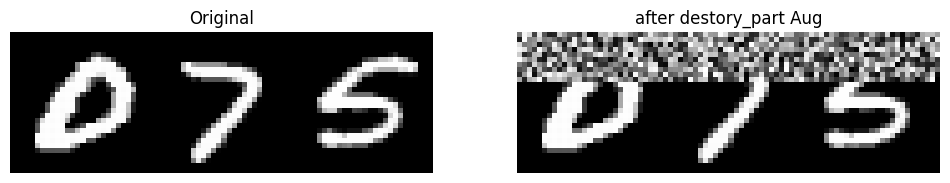

In [21]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],destory_part(my_new_DB[ran][0],10)],["Original","after destory_part Aug"])

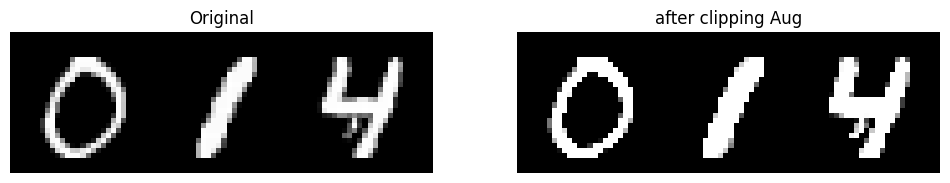

In [22]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],clipping(my_new_DB[ran][0],20,100)],["Original","after clipping Aug"])


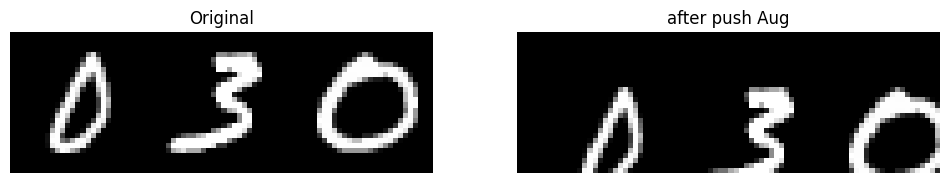

In [23]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],push(my_new_DB[ran][0],5,7)],["Original","after push Aug"])


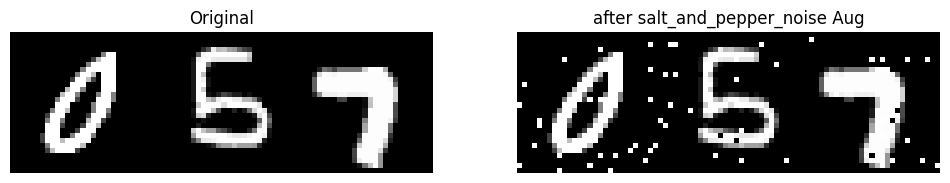

In [24]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],salt_and_pepper_noise(my_new_DB[ran][0])],["Original","after salt_and_pepper_noise Aug"])


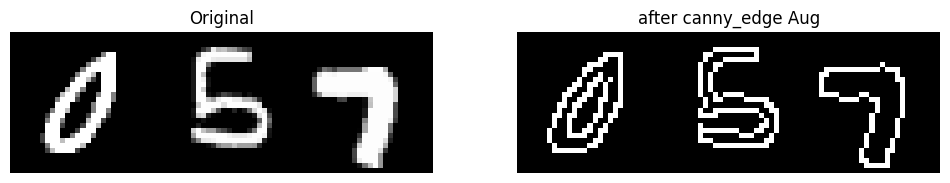

In [25]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],canny_edge(my_new_DB[ran][0])],["Original","after canny_edge Aug"])


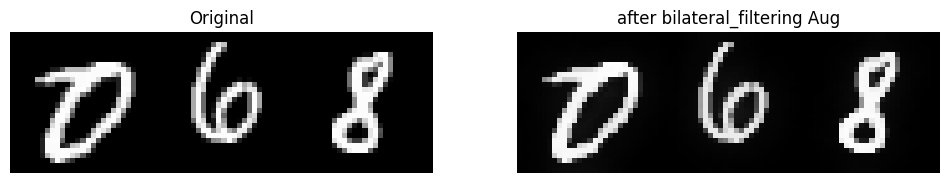

In [26]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],bilateral_filtering(my_new_DB[ran][0])],["Original","after bilateral_filtering Aug"])


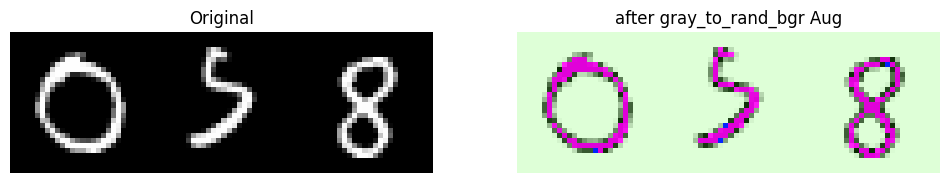

In [27]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],gray_to_rand_bgr(my_new_DB[ran][0])],["Original","after gray_to_rand_bgr Aug"])


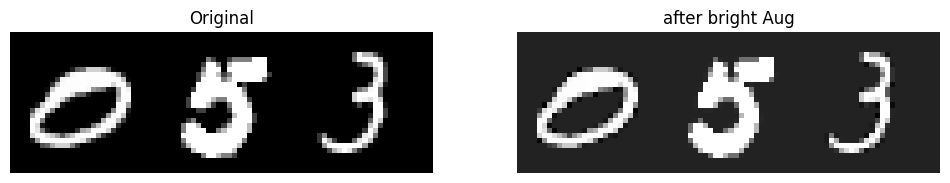

In [28]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],bright(my_new_DB[ran][0])],["Original","after bright Aug"])


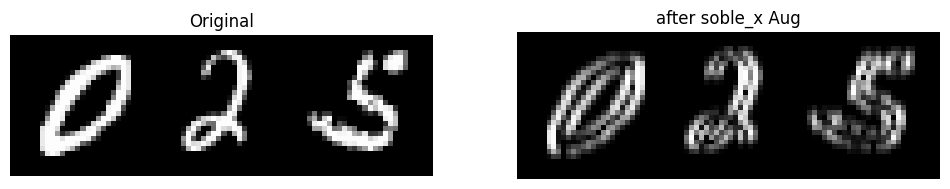

In [29]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],soble_x(my_new_DB[ran][0])],["Original","after soble_x Aug"])


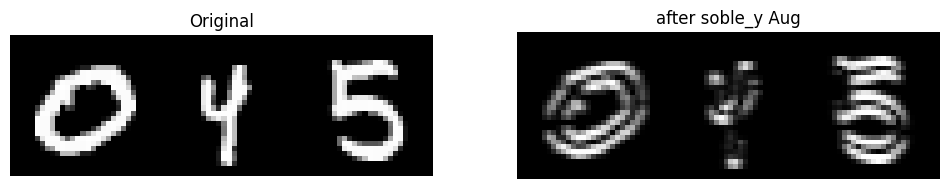

In [30]:
ran = random.randint(0,100)
create_subplots([my_new_DB[ran][0],soble_y(my_new_DB[ran][0])],["Original","after soble_y Aug"])


# random images from the dataset

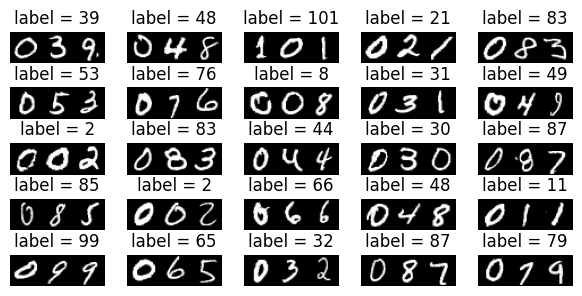

In [31]:
plotSome(5)

#Summary

i downloaded the mnist data set as instructed and i created the 101 classes with 4001 samples for each 3 digit number, i did that by pairing diffrent number samples to each other and by that i had created a 3 digit number and geranted that we dont have the same sample more then once in our dataset.

I saved the new photos in folders and added them to the array for joint work. I have also attached pictures of it.

after that i showed the augmentations that i have implemented in my lab 3 on some samples of the data set.

after that i made another 10 augmentations that and i showed how they affect the images. some of those augmentations from searching onlines on new augmentations and how to implement them, some i have made up and some we learn in class and i just implemented them, and some I learned from YouTube when I learned the basics of image processing




# 2. Shapes

- Shapes definition and functions requirements:
- Minimal and maximal area: 100-600 pixels, the shape could not be cropped by image boundaries.
- Each shape will have random size, location, orientation and color.
- Each image will include one of the following shapes:
- Triangle
- Rectangle
- Circle/Elipse

- Each image should be of dimensions 50x50x3.

In [32]:
# 2- shapes dataset
def draw_circle( ):
  size = 50 
  radius = random.uniform(100, 600)#size of shape area is between 100-600 pixels
  radius = int(np.sqrt(radius/math.pi)) # calculate radius from area
  thickness = random.randint(2, 4)
  center = (random.randint(1 + radius + thickness, size -(radius + thickness + 1)) for _ in range(2))
  img = np.zeros((size, size, 3), dtype = "uint8")
  b,g,r= [random.randint(1, 255) for _ in range(3)]
  cv2.circle(img, tuple(center), radius, (b,g,r), thickness)# make circle using cv2 this functin work in bgr colors 
  return img

def draw_Rectangle():
    size = 50
    while True:
        p1,p2 = [[random.randint(2, 48) for _ in range(2)] for _ in range(2)]
        if 100 <= abs(p1[0] - p2[0]) * abs(p1[1] - p2[1]) <= 600:
            break
    img = np.zeros((size, size, 3), np.uint8)
    b,g,r= [random.randint(1, 255) for _ in range(3)]
    cv2.rectangle(img, tuple(p1), tuple(p2), (b, g, r), random.randint(1, 2))
    return img

def draw_Triangle():
  size = 50 
  area = 0
  img = np.zeros((size, size, 3), dtype = "uint8")# make img array
  thickness = random.randint(1, 3)
  while not 100 <= area <= 600: #make sure only triangle with area between 100-600 are created
    p1, p2, p3 = [[random.randint(2 + thickness, 48 - thickness) for _ in range(2)] for _ in range(3)]

    l1_len = math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
    l2_len = math.sqrt((p2[0] - p3[0]) ** 2 + (p2[1] - p3[1]) ** 2)
    l3_len = math.sqrt((p1[0] - p3[0]) ** 2 + (p1[1] - p3[1]) ** 2)
    s = (l1_len + l2_len + l3_len) /2 # calculate half of perimeter
    area = math.sqrt(s * (s - l1_len) * (s - l2_len) * (s - l3_len)) # herons formula to calculate triangle area
  
  b,g,r= [random.randint(1, 255) for _ in range(3)]
  cv2.line(img, p1, p2, (b, g, r), thickness)#create 3 lines to make triangle using cv2 this functin work in bgr
  cv2.line(img, p2, p3, (b, g, r), thickness)
  cv2.line(img, p1, p3, (b, g, r), thickness)
  return img


- Create at least 300 different samples of each class i.e.(circles with different radius, etc..)

In [33]:
shape_data_set = [list() for _ in range(3)] # 3 kinds of shapes

shapes = [draw_Triangle, draw_Rectangle, draw_circle]#callable
class_names = ['triangle', 'rectangle', 'circle']

for class_num, (shape_fn, class_name) in enumerate(zip(shapes, class_names)):
  os.makedirs(f'./shapes/{class_name}')
  for i in range(350):
    img = shape_fn()
    shape_data_set[class_num].append(img)
    cv2.imwrite(f'./shapes/{class_name}/num{i}.jpeg', img)

- Show the images you created without augmentations and with the augmentations from lab 3

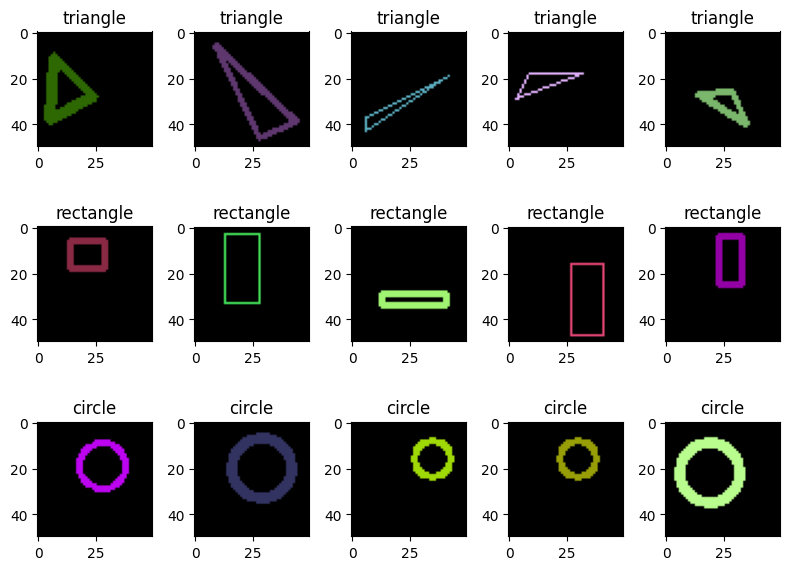

In [34]:
fig,ax = plt.subplots(3,5,figsize = (8,6))
ax = ax.ravel() 
for class_indexs in range(len(shape_data_set)):
  for i in range(5):
    index = class_indexs*5 + i
    ax[index].imshow(shape_data_set[class_indexs][random.randint(0,350)],cmap = 'gray')
    ax[index].set_title(f"{class_names[class_indexs]}")
plt.tight_layout()
plt.show()

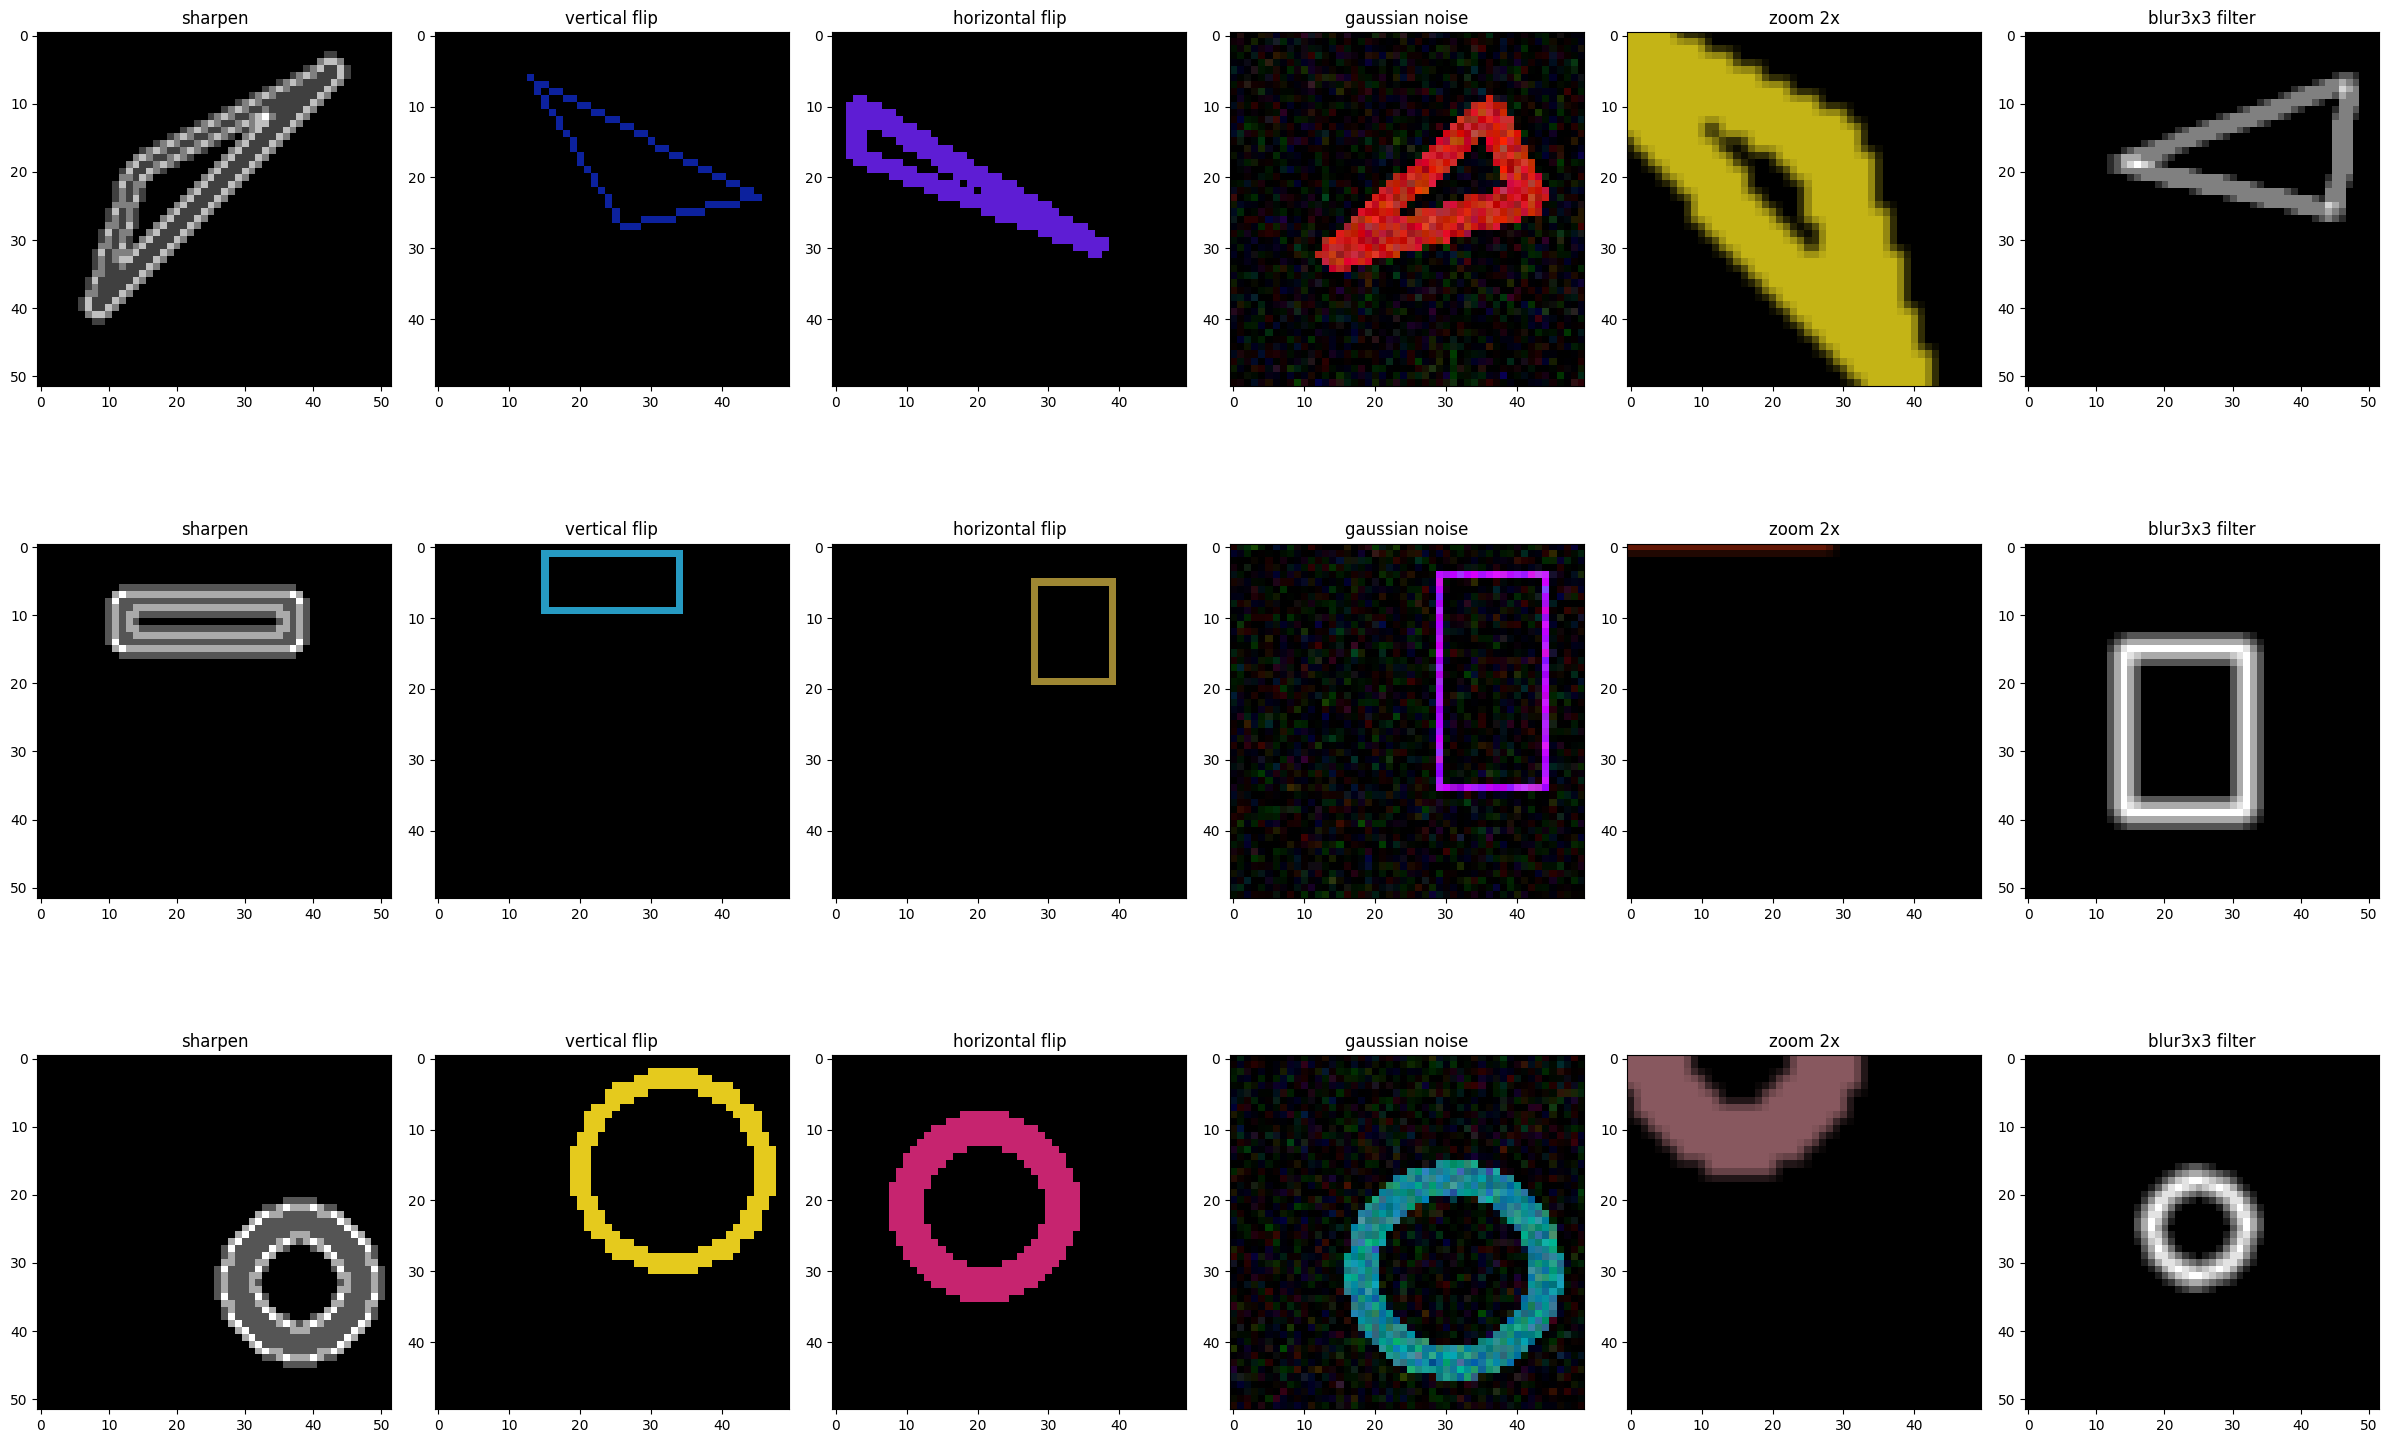

In [35]:
fig,ax = plt.subplots(3,6,figsize = (24,16))
ax = ax.ravel() 
for class_indexs in range(len(shape_data_set)):
    index = class_indexs*6

    ax[index].imshow(sharpen(cv2.cvtColor(shape_data_set[class_indexs][random.randint(0,350)], cv2.COLOR_BGR2GRAY)),cmap = 'gray')
    ax[index].set_title(f"sharpen")
    
    ax[index+1].imshow(horizontal_vertical_flip(shape_data_set[class_indexs][random.randint(0,350)],0),cmap = 'gray')
    ax[index+1].set_title(f"vertical flip")

    ax[index+2].imshow(horizontal_vertical_flip(shape_data_set[class_indexs][random.randint(0,350)],1),cmap = 'gray')
    ax[index+2].set_title(f"horizontal flip")

    ax[index+3].imshow(add_gaussian_noise(shape_data_set[class_indexs][random.randint(0,350)],0,20),cmap = 'gray')
    ax[index+3].set_title(f"gaussian noise")

    ax[index+4].imshow(zoom(shape_data_set[class_indexs][random.randint(0,350)],2),cmap = 'gray')
    ax[index+4].set_title(f"zoom 2x")
    
    ax[index+5].imshow(blur3(cv2.cvtColor(shape_data_set[class_indexs][random.randint(0,350)], cv2.COLOR_BGR2GRAY)),cmap = 'gray')
    ax[index+5].set_title(f"blur3x3 filter")
plt.tight_layout()
plt.show()
  #1 horizontally , 0 vertically



- Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0, rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train images and 10% test images. The class call should be as follows:

In [36]:
from sklearn.model_selection import train_test_split

class ShapeDataLoader:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.class_names = ["triangle", "rectangle", "circle"]
        self.num_classes = len(self.class_names)
        
    def load_data(self):
        images = []
        labels = []
        for class_index in range(self.num_classes):
            class_name = self.class_names[class_index]
            class_dir = os.path.join(self.data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = plt.imread(image_path)
                images.append(image)
                labels.append(class_index)
                
        return np.array(images), np.array(labels)
    
    def get_train_test_split(self, test_size=0.1, random_state=42):
        images, labels = self.load_data()
        X_train, X_test, y_train, y_test = train_test_split(images, labels, 
                                                            test_size=test_size, 
                                                            random_state=random_state, 
                                                            stratify=labels)
        return X_train, X_test, y_train, y_test


In [37]:
data_dir = "/content/shapes"
data_loader = ShapeDataLoader(data_dir)
X_train, X_test, y_train, y_test = data_loader.get_train_test_split()
images, labels = data_loader.load_data()

# 3 .Write a short summary of everything you've done in this work

#summery
Ive built the 101 classes dataset from the mnist data set as i wrote in the last summery.

I saved the new images in folders and added them to the array for joint work. I have also attached pictures of it.

after that i showed the augmentations that i have implemented in my lab 3 on some samples of the data set.

after that i made another 10 augmentations that and i showed how they affect the images.

in the shape mission i created the shape dataset with 3 classes for each shape i ask for , that includes 350 samples for each lable.

each sample is difrent by color, location in the image and its size and thickness.
i applied some augmentations on the shape dataset and showed the result.

i also made a class that load the dataset from a diractory and can split it to 90% train data and 10% test data.

overall i learnd a lot .
i worked on this task around 40 hours ,it was 40 hours of searching and studing from all over the internet.

